In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
preferences_colors = {
	'1' : { # Spirulina
			'color_1' : '#C5E1A5',
			'color_2' : '#7FB871',
			},
	'2' : { # Chlorella
			'color_1' : '#FFF9C4',
			'color_2' : '#FDDD79',
			},
	'3' : { # Palmaria
			'color_1' : '#F7CBDA',
			'color_2' : '#F7AFC8'
			},
}

In [3]:
def csv_to_dic(csv_file):
	'''Funzione che inserisce i dati dei csv delle buy responses in un dizionario 
		{burger_type: { buy_response : occurrences }, ... }
	formattando il tutto'''

	# Given a series/column, makes a dic {answer : counts}
	def occurrences_dic(column):
		return column.value_counts().to_dict()

	# Load the CSV file into a DataFrame
	df = pd.read_csv(csv_file)

	# Counts the columns
	n_columns = len(df.columns)

	# Initialize the dictionary
	dic = {}

	# Iterates for every column of the csv
	for column in range(n_columns):

		# Selects only the current column
		sel_column = df.iloc[:, column]
		
		# If the csv is a "buy type" (the ones with more than one column)
		if n_columns != 1:

			# Get and format the header
			header = sel_column.name

			# Makes dic {answer : counts}
			occurrences = occurrences_dic(sel_column)
			dic[header] = occurrences
		
		# If the csv is a "prefer type" (the ones with only one column)
		else:
			dic = occurrences_dic(sel_column)

	return dic

In [4]:
# dic = csv_to_dic('data-jot_forms/burger_1.csv')

In [5]:
def pieplot(data, filename, colors):
	'''Crea un pieplot per ...'''

	# Definizione dati
	labels = data.keys()
	values = data.values()

	# Calcola la percentuale
	def make_autopct(values):
		def my_autopct(pct):
			total = sum(values)
			val = int(round(pct*total/100.0))
			return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
		return my_autopct
		
	# Crea il pieplot
	plt.pie(values, labels = labels, colors=current_colors, autopct=make_autopct(values))
	plt.savefig('jot_forms-outs/' + filename + '.pdf', format="pdf", bbox_inches='tight')

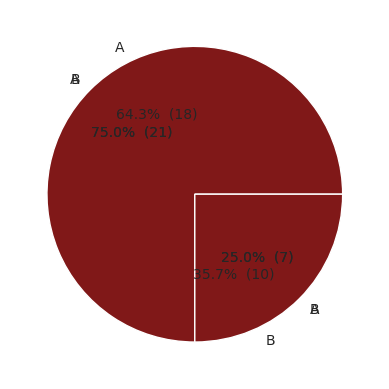

In [6]:
data_path = 'data-jot_forms/structured/'

for csv in os.listdir(data_path):
	
	dic = csv_to_dic(data_path + csv)
	
	alga = csv[-5]
	current_colors = list(preferences_colors[alga].values())
	pieplot(dic, csv[:-4], current_colors)

# old

In [7]:
# # Loads algae names
# with open('../../fixed_values-pickles/pickle_files/algae_names.pkl', 'rb') as fp:
# 	algae_names = pickle.load(fp)

# # Loads content types (ashes, moisture, ...)
# with open('../../fixed_values-pickles/pickle_files/content_types.pkl', 'rb') as fp:
# 	content_types = pickle.load(fp)

# control_color = '#FFFFFF' # white
# xlabel = 'Burger type'
# ylabel = 'Percentage of '

# def get_contenttype(in_ct):
# 	content_type = content_types[in_ct]
# 	return content_type

# def set_filename(alga, ct):
# 	filename = alga + '_' + ct
# 	return filename

In [8]:
preferences_colors = {
	'spirulina' : {
			'color_1' : '#C5E1A5',
			'color_2' : '#7FB871'
			},
	'spirulina' : {
			'color_1' : '#F7CBDA',
			'color_2' : '#FBC02D',
			},
	'chlorella' : {
			'color_1' : '#F7CBDA',
			'color_2' : '#FFF9C4',
			},
}
preferences_colors

{'spirulina': {'color_1': '#F7CBDA', 'color_2': '#FBC02D'},
 'chlorella': {'color_1': '#F7CBDA', 'color_2': '#FFF9C4'}}

# First datas

In [9]:
# ##### SAVEFIG

# def pieplot_first(filename, a, b, a_label, b_label, a_color, b_color):

# 	# Definizione dati
# 	values = [a, b]
# 	labels = [a_label, b_label]

# 	# Calcola la percentuale
# 	def make_autopct(values):
# 		def my_autopct(pct):
# 			total = sum(values)
# 			val = int(round(pct*total/100.0))
# 			return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
# 		return my_autopct

# 	# Crea il pieplot
# 	plt.pie(values, labels = labels, colors=[a_color, b_color], autopct=make_autopct(values))

# 	plt.savefig('pie_outs/'+filename+'.pdf', format="pdf")

In [10]:
# ##### PRINT

# def pieplot_first(data, a_label, b_label, a_color, b_color):


# 	# Definizione dati
# 	values = [a, b]
# 	labels = [a_label, b_label]

# 	# Calcola la percentuale
# 	def make_autopct(values):
# 		def my_autopct(pct):
# 			total = sum(values)
# 			val = int(round(pct*total/100.0))
# 			return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
# 		return my_autopct

# 	# Crea il pieplot
# 	plt.pie(values, labels = labels, colors=[a_color, b_color], autopct=make_autopct(values))

In [11]:
# # 
# filename = ''
# a = 7
# b = 21
# a_label = ''
# b_label = ''
# a_color = '#C8EFCE'  # white
# b_color = '#006100'  # light green

# pieplot(filename, a, b, a_label, b_label, a_color, b_color)